# Métodos III - Cálculo Vectorial


## Operador Nabla. Campos conservativos


Jose A. Hernando

*Departamento de Física de Partículas. Universidade de Santiago de Compostela*

Marzo 2019


In [1]:
import time
print(' Last version ', time.asctime() )

 Last version  Fri Apr  5 10:21:20 2019


### Objectivos

Introducción del operador nabla, del gradiente, rotacional y divergencia de un campo.

Interpretación del rotacional y la divergencia.

Relaciones entre ellos.

In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'

### Operador nabla.

Definimos el operador nabla:
$$
\nabla = \left( \frac{\partial }{ \partial x}, \frac{\partial }{ \partial y}, \frac{\partial }{\partial z} \right)
$$

que puede actuar sobre campos escalares, $f(x, y, z)$, dando lugar al **gradiente**, $\nabla f(x, y, z)$:

$$
\nabla f(x, y, z) = \left( \frac{\partial f}{ \partial x}, \frac{\partial f}{ \partial y}, \frac{\partial f}{\partial z} \right)
$$

Y sobre el gradiente, dando lugar al **laplaciano**, $\nabla^2$:

$$
\nabla (\nabla f) = \nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} + \frac{\partial f}{\partial z^2}
$$

o sobre campos vectoriales, ${\bf F}(x, y, z) = \left(F_x, F_y, F_z \right)$, que da lugar a la **divergencia**:

$$
\nabla \cdot {\bf F} = \frac{\partial F_x}{\partial x } +\frac{\partial F_y}{\partial y} + \frac{\partial F_z }{\partial z } 
$$

y al **rotacional**:

$$
\nabla \times {\bf F} = \left| \begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
\frac{\partial}{ \partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z} \\
F_x & F_y & F_z \\
 \end{array} \right| 
 = \left(\frac{\partial F_z}{\partial x} - \frac{\partial F_y}{\partial y}, \, - \frac{\partial F_x}{\partial z} + \frac{\partial F_z}{\partial x}, \, \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y}\right) 
$$


*Ejercicio*: Calcula el rotacional y la divergencia de los siguientes campos vectoriales: ${\bf F}(x, y) = (\pm x, \pm y)$ y ${\bf F}(x, y) = (\pm y, \pm x)$.

*Cuestión:* Si colocas un patito de plástico en el interior de la espira cuadrada ¿gira? ¿sale?

*Cuestión:* Si el campo correspondiense a las velocidades de unos móviles, el medio ¿se expandería o comprimiría? ¿sería incomprimible?

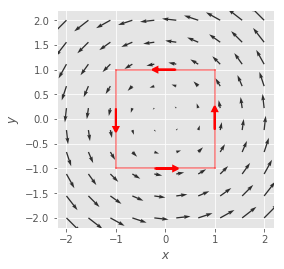

In [3]:
xrange = (-2., 2., 10)
Ex = lambda x, y:  -y/2
Ey = lambda x, y:   x/2
gf.quiver2d(Ex, Ey, xrange, xrange);
x0, y0, xside, yside = -1, -1., 2., 2.
gf.square( (x0, y0), xside, yside, color = 'r');
gf.arrow ( x0 + 0.4 * xside, y0              ,  0.2 * xside,  0.0       , head = 0.1, color = 'r');
gf.arrow ( x0 + xside      , y0 + 0.4 * yside,  0.0        ,  0.2* yside, head = 0.1, color = 'r');
gf.arrow ( x0 + 0.6 * xside, y0 + 1.0 * yside, -0.2 * xside,  0.0       , head = 0.1, color = 'r');
gf.arrow ( x0              , y0 + 0.6 * yside,  0.0        , -0.2* yside, head = 0.1, color = 'r');

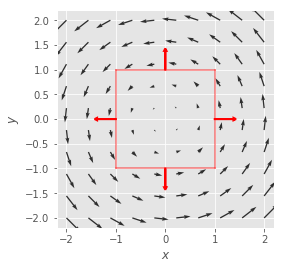

In [4]:
gf.quiver2d(Ex, Ey, xrange, xrange);
x0, y0, xside, yside = -1, -1., 2., 2.
gf.square( (x0, y0), xside, yside, color = 'r');
gf.arrow ( x0 + 0.5 * xside, y0              ,  0.0 * xside, -0.2 * yside, head = 0.05, color = 'r');
gf.arrow ( x0 + xside      , y0 + 0.5 * yside,  0.2 * xside,  0.0 * yside, head = 0.05, color = 'r');
gf.arrow ( x0 + 0.5 * xside, y0 + 1.0 * yside,  0.0 * xside,  0.2 * yside, head = 0.05, color = 'r');
gf.arrow ( x0              , y0 + 0.5 * yside, -0.2 * xside, -0.0 * yside, head = 0.05, color = 'r');

*Teorema*: Sea $f(x, y, z)$ un campo escalar con derivadas segundas continuas, se cumple: $\nabla \times \nabla f = 0$. El rotacional de un gradiente es nulo.

$$
\nabla \times \nabla f  = \left| 
\begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
\frac{\partial}{ \partial x} &  \frac{\partial}{\partial y} & \frac{\partial}{\partial z}  \\
\frac{\partial f}{ \partial x} & \frac{\partial f}{\partial y} & \frac{\partial f}{\partial z} 
\end{array} \right| 
$$

$$
 = \left( 
\left(\frac{\partial^2 f}{\partial y\partial z} - \frac{\partial^2 f}{\partial z \partial y}\right), \;
\left(\frac{\partial^2 f}{\partial z\partial x} - \frac{\partial^2 f}{\partial x \partial z}\right),  \;
\left(\frac{\partial^2 f}{\partial x\partial y} - \frac{\partial^2 f}{\partial y \partial x}\right) 
\right)
$$

como las derivadas segundas son continuas, las derivadas segundas cruzadas son iguales, y por lo tanto:

$$
\nabla \times \nabla f = 0
$$


*Ejemplo:* sea $f(x, y) = xy$. Su gradiente es $\nabla f (x, y) = (y, x)$, cuyo rotacional es nulo.

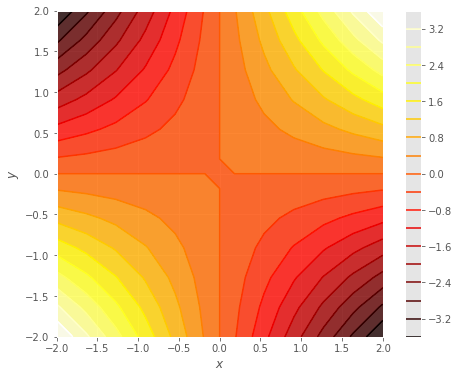

In [5]:
xrange = (-2., 2., 12)
fc = lambda x, y: x*y
Ex = lambda x, y:  y
Ey = lambda x, y:  x
gf.contour (fc, xrange, xrange);

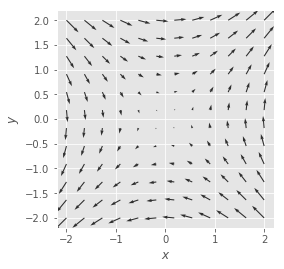

In [6]:
gf.quiver2d(Ex, Ey, xrange, xrange);

*Ejercicio*: Demostrar que si las funciones componentes del campo vectorial, ${\bf F}(x, y, z) = (F_x, F_y, F_z)$ tienen derivadas segundas continuas, se cumple: $\nabla (\nabla \times {\bf F}) = 0$, la divergencia del rotacional es nula.

*Teorema*: Sean $f,g$ campos escalares, ${\bf F},{\bf G}$ campos vectoriales, con derivadas segundas continuas, y $c$ una constante, se cumple:

$\nabla (f+g) = \nabla f  + \nabla g$ 

$\nabla (cf) = c \, \nabla f $ 

$\nabla (fg) = (\nabla f) g  + g (\nabla g)$ 

$\nabla (f/g) = (\nabla f)g - f(\nabla g)/g^2$

$\nabla ({\bf F}+{\bf G}) = \nabla {\bf F}  + \nabla {\bf G}$

$\nabla \times ({\bf F}+{\bf G}) = \nabla \times {\bf F}  + \nabla \times {\bf G}$

$\nabla (f {\bf F}) = f (\nabla {\bf F}) + (\nabla f) {\bf F}$ 

$\nabla ({\bf F} \times {\bf G}) = {\bf G} \, (\nabla \times {\bf F})  - {\bf F} \, (\nabla \times {\bf G})$

$\nabla ( \nabla \times {\bf F}) = 0$

$\nabla \times (f {\bf F}) = f \nabla \times {\bf F} + \nabla f \times {\bf F} $

$\nabla \times \nabla f = 0$

$\nabla^2 (fg) = f \nabla^2 g  + g \nabla^2 f - 2 (\nabla f) (\nabla g) $

$\nabla (\nabla f \times \nabla g) = 0$

$\nabla (f \nabla g - g \nabla f) = f \nabla^2 g - g \nabla^2 f$

### Campos conservativos

Decimos que un campo vectorial, ${\bf F}$, es **conservativo** si para todas las trayectorias que unen dos puntos del dominio, $A, \, B$, la integral de campo a lo largo de cada una de ellas vale lo mismo.

Sea don trayectorias, ${\bf c}_1, \, {\bf c}_2$, que unen $A \to B$, si el campo ${\bf F}$ es conservativo se cumple:

$$
\int_{{\bf c}_1} {\bf F} \, \mathrm{d}{\bf s} = \int_{{\bf c}_2} {\bf F} \, \mathrm{d}{\bf s}
$$

O lo que es lo mismo para cualquier trayectoria cerrada, ${\bf c}$, que parta de $A$, llegue a $B$, y regrese a $A$, la integral es nula:

$$
\oint_{{\bf c}} {\bf F} \, \mathrm{d}{\bf s} = 0
$$


*Teorema*: Sea un campo ${\bf F}(x, y)$ es conservativo si y solo sí:
$$
\frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} = 0
$$

Por el teorema de Green, la integral del campo a lo largo de una curva cerrada cumple:

$$
\oint_{{\bf c}} {\bf F} \, \mathrm{d}{\bf s} = \int_R \left( \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y}\right) \mathrm{d}x \mathrm{d}y
$$

Si se cumple, 
$$
\frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} = 0,
$$
entonces el campo es conservativo.

Si en alguna bola no se cumple 
$$
\frac{\partial F_y}{\partial x} = \frac{\partial F_x}{\partial y}
$$ 
entonces la integral a lo largo de la frontera de la bola $\oint_{{\bf c}} {\bf F}\, \mathrm{d}{\bf s} \neq 0$, y el campo no es conservativo.


*Ejercicio*: Verfica que el campo ${\bf F}(x, y) = (2xy + y^3, x^2 + 3xy^2 + y^2)$ es conservativo.

$$
\frac{\partial F_x}{ \partial y} = 2x + 3y^2
$$

$$
\frac{\partial F_y}{ \partial x} = 2x + 3y^2
$$

¡Es conservativo!

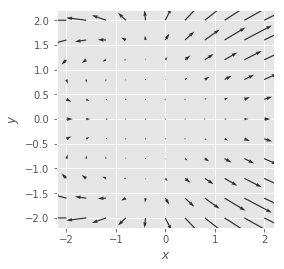

In [25]:
xrange = (-2., 2., 11)
Ey = lambda x, y: 2*x*y + y*y*y
Ex = lambda x, y:   x*x + 3*x*y*y + y*y
gf.quiver2d(Ex, Ey, xrange, xrange);

Pero todavía es más fuerte:
    
*Teorema*: El campo ${\bf F}(x, y) = (F_x, F_y)$ es conservativo sí y solo sí, existe un campo escalar $U(x, y)$ tal que ${\bf F} = \nabla U$.


Si ${\bf F} = \nabla U$, entonces se cumple:

$$
\frac{\partial F_y}{\partial x} - \frac{\partial F_x}{ \partial y} = 0
$$

Si ${\bf F}$ es conservativo, entonces podemos encontrar $U(x, y)$, tomemos como referencia un punto $(x_0, y_0)$

$$
U(x, y) = \int_{x_0}^x F_x(x, y) \, \mathrm{d}x + g(y)
$$
donde $g(y)$ es una función de $y$. Se cumple: $ F_x = \frac{\partial U}{\partial x}$

$F_y$ debe ser:
$$
F_y(x, y) = \frac{\partial U(x, y)}{\partial y} 
= \frac{\partial }{\partial y} \left( \int_{x_0}^x F_x(x, y) \, \mathrm{d}x + g(y) \right) 
= \int_{x_0}^x \frac{\partial F_x(x, y) }{\partial y} \, \mathrm{d}x + \frac{\mathrm{d} g(y)}{\mathrm{d}y}  
$$
Luego:
$$
g(y) = \int_{y_0}^y \left( F_y(x, y) - \int_{x_0}^x \frac{\partial F_x(x, y)}{\partial y} \, \mathrm{d}x \right) \mathrm{d}y
$$
y verificamos que $g(y)$ solo depende de $y$:
$$
\frac{\partial g(y)}{\partial x} = \int_{y_0}^y \left( \frac{\partial F_y}{ \partial x} - \frac{\partial F_x}{\partial y}\right) \mathrm{d}y = 0
$$

*Ejercicio*: Calcula el campo escalar, $U(x, y)$, cuyo campo conservativo es ${\bf F}(x, y) = (2xy + y^3, x^2 + 3xy^2 + y^2)$. 


tomemos $(x_0, y_0)$ el origen.

$$
U(x, y) = \int_0^x (2xy + y^3) \, \mathrm{d}x + g(y) = x^2y + x y^3 + g(y)
$$

donde
$$
F_y = \frac{\partial U}{\partial y} \to x^2 + 3xy^2 + 2y = x^2 + 3xy^2 + \frac{\mathrm{d}g(y)}{\mathrm{d}y}
$$
luego:
$$
\frac{\mathrm{d}g(y)}{\mathrm{d}y} = 2y \to g(y) = y^2 + C
$$
donde $C$ es una constante.

Así:

$$
U(x, y) = x^2y + x y^3 + y^2 +C
$$


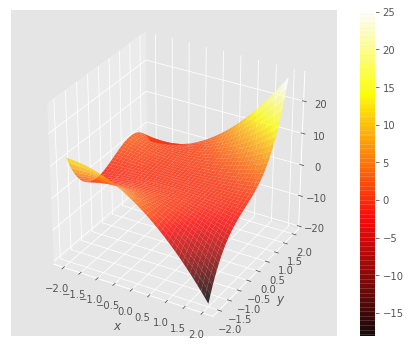

In [31]:
xrange = (-2., 2., 40)
fc = lambda x, y: y*x*x + x*y*y*y + y*y 
gf.graph(fc, xrange, xrange);

*Observa* como el siguiente campo vectorial no puede ser conservativo. Sigue de un vector a otro como si fuera un gradiente (subiendo en un supuesto campo escalar del que provendía) ... y verás que no es posible.

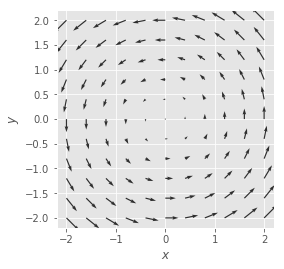

In [35]:
xrange = (-2., 2., 11)
Ey = lambda x, y:  x
Ex = lambda x, y: -y
gf.quiver2d(Ex, Ey, xrange, xrange);

Esto es, un campo convervativo proviene, o puede expresarse, como el gradiente de un campo escalar.
Si un campo no tiene rotacional es convervativo. Y si es conservativo no tiene rotacional.

Observa el dibujo de Escher. ¡Debe ser una ilusión optica! porque las escaleras siguen el gradiente de su altura, y por lo tanto al circular a lo largo como la pista cerrada que forman no puede tener rotacional.

<img src="imgs/escher_stairs.jpg" width="300" />

*Teorema*: Sea $U(x, y)$ un campo escalar con derivadas segundas continuas, entonces la integral de su gradiente, $\nabla U$, a lo largo de una trayectoria, ${\bf c}$, que une dos puntos, $A, \, B$ es la diferencia de $U$ en $B$ y $A$.

$$
\int_{{\bf c}} \nabla U \, \mathrm{d}{\bf s} = U(B) - U(A)
$$

Sea ${\bf c}(t)$ línea parametrizada en $t \in [a, b]$, donde ${\bf c}(a) = A, \, {\bf c}(b) = B$.

$$
\int_{\bf c} \nabla U \, \mathrm{d}{\bf s} 
= \int_a^b \nabla U({\bf c}(t)) \, \dot{{\bf c}}(t) \, \mathrm{d}t 
$$

Por la regla de la cadena:

$$
= \int_a^b \frac{\mathrm{d} U({\bf c}(t))}{\mathrm{d}t} \, \mathrm{d}t = U({\bf c}(t)) \, \Big|_a^b 
= U({\bf c}(b)) - U({\bf c}(a)) = U(B) - U(A)
$$

*Ejemplo*: La altura es un campo conservativo. Da igual que camino siguas para llegar a la cumbre de una montaña, puedes seguir caminos más fáciles o más arduos, la diferencia de altura respecto de dónde empezaste siempre será la misma. 

#### ¡Aún hay más!

Muchas de estas cosas te sonarán por Física General.

El potencial eléctrico, $V$, da lugar a un campo eléctrico, ${\bf E} = - \nabla V$, que proviene del gradiente y cuyo rotacional es nulo, es por lo tanto un campo conservatico. La integral del campo entro dos puntos es simplemente la diferencia de potencial entre ellos.

En Física la fuerza sobre un móvil viene del gradiente de una energía potencial, ${\bf F} = - \nabla U$. De está relación se conserva la energía. Consideremos un móvil, de masa $m$, que sigue su trayectoria libre ${\bf c}(t)$ en función del tiempo $t$. Su energía total es la energía cinética más la potencial:

$$
E(t) = \frac{1}{2} m \dot{{\bf c}}^2(t) + U({\bf c}(t))
$$

Si derivamos respecto at $t$, y aplicando la regla de la cadena:
$$
\frac{\mathrm{d}E}{\mathrm{d}t} = m \, \dot{{\bf c}}(t) \, \ddot{{\bf c}}(t) + \nabla U({\bf c}(t)) \, \dot{{\bf c}}(t) 
= \left[m \, \ddot{{\bf c}}(t)  + \nabla U({\bf c}(t)) \right] \, \dot{{\bf c}}(t) = 0
$$

Si se cumple
$$
{\bf F} = - \nabla U = m \ddot{{\bf c}}
$$
